In [ ]:
import sympy as sp
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Questão 1

Uma call é uma opção de compra de algum ativo. Isso significa que, ao comprar uma call, você adquire o direito de comprar o ativo real a um preço pré estabelecido em alguma data futura (opção europeia) ou no período até um certo dia (opção americana).
A put funciona do mesmo jeito, porém como uma opção de venda do ativo.

Questão 2

In [ ]:
x,y,z,S,q,T,r,K,v,C,P = sp.symbols("x y z S q T r K v C P")

In [ ]:
def CDF(value):
    CDF = integrate((1/sqrt(2*pi*1))*exp(-1*((x-0)**2)/(2*1**2)),(x,-oo,value))
    return(N(CDF))

In [ ]:
d1=(ln(S/K)+(r-q+0.5*v**2)*T)/(v*sqrt(T))
d2=d1-v*sqrt(T)

In [ ]:
black_scholes= S*exp(-q*T)*CDF(d1)-exp(-r*T)*K*CDF(d2)
black_scholes

-K*(0.5*erf(sqrt(2)*(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))/2) + 0.5)*exp(-T*r) + S*(0.5*erf(sqrt(2)*(T*(-q + r + 0.5*v**2) + log(S/K))/(2*sqrt(T)*v)) + 0.5)*exp(-T*q)

Questão 3

A put-call parity é uma fórmula que relaciona os preços da opção de compra e de venda de um ativo. A operação da paridade put-call funciona da seguinte forma:


*   Compra uma call
*   Soma o preço do strike ao valor presente utilizando capitalização contínua
*   Vende uma put
*   Subtrai o valor do ativo hoje

Ao fazer essas operações, o resultado tem que ser igual a 0, visto que, caso fosse diferente, era possível operar com arbitragem na relação entre put e call.





In [ ]:
put_call = Eq(C + K*exp(-r*T), P + S)
put_call

Eq(C + K*exp(-T*r), P + S)

C: Preço da Call

K: Valor de Strike (que trazemos ao valor presente)

P: Preço da Put

S: Preço da ação no presente


In [ ]:
C_1 = 50
K_1 = 50
DTE = 45
T_1 = DTE/252
r_1 = 0.05
S_1 = 50
q_1 = 0
v_1 = 0.3

In [ ]:
p_t = Eq(C + K*exp(-r*T) - S, P)
p_t.subs(C, C_1).subs(K, K_1).subs(T, T_1).subs(r, r_1).subs(S, S_1)

Eq(49.5555584949796, P)

Questão 4

As letras gregas delta, gama, veja e teta são as derivadas da equação de black-scholes em relação a cada um de seus parâmetros.

Delta: Ao derivarmos a equação de black-scholes em relação ao preço atual da ação, obtemos o delta, que indica a variação no preço da opção em relação a variação no preço da ação no presente.

Gamma: O gama representa a segunda derivada da equação de black-scholes em relação ao preço da ação, indicando a convexidade do preço da opção em função do preço do ativo.

Theta: Quando derivamos a função de black-scholes em relação ao tempo (com um sinal de negativo antes da derivada) obtemos o theta. Ele indica a variação do preço da opção quando se aproxima à data de vencimento da derivativo.

Vega: A letra grega vega indica a variação do preço da opção a cada 1% de variação na volatividade implícita do derivativo.

In [ ]:
# DELTA
delta = black_scholes.diff(S)
print("Delta:")
delta


Delta:


-0.5*sqrt(2)*K*exp(-T*r)*exp(-(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2/2)/(sqrt(pi)*S*sqrt(T)*v) + (0.5*erf(sqrt(2)*(T*(-q + r + 0.5*v**2) + log(S/K))/(2*sqrt(T)*v)) + 0.5)*exp(-T*q) + 0.5*sqrt(2)*exp(-T*q)*exp(-(T*(-q + r + 0.5*v**2) + log(S/K))**2/(2*T*v**2))/(sqrt(pi)*sqrt(T)*v)

In [ ]:
# Gamma
gamma = delta.diff(S)
print("Gamma:")
gamma

Gamma:


0.5*sqrt(2)*K*(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))*exp(-T*r)*exp(-(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2/2)/(sqrt(pi)*S**2*T*v**2) + 0.5*sqrt(2)*K*exp(-T*r)*exp(-(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2/2)/(sqrt(pi)*S**2*sqrt(T)*v) + 0.5*sqrt(2)*exp(-T*q)*exp(-(T*(-q + r + 0.5*v**2) + log(S/K))**2/(2*T*v**2))/(sqrt(pi)*S*sqrt(T)*v) - 0.5*sqrt(2)*(T*(-q + r + 0.5*v**2) + log(S/K))*exp(-T*q)*exp(-(T*(-q + r + 0.5*v**2) + log(S/K))**2/(2*T*v**2))/(sqrt(pi)*S*T**(3/2)*v**3)

In [ ]:
# Theta
theta = - black_scholes.diff(T)/252
print("Theta:")
theta

Theta:


-K*r*(0.5*erf(sqrt(2)*(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))/2) + 0.5)*exp(-T*r)/252 + 0.00198412698412698*sqrt(2)*K*(-v/(2*sqrt(T)) + (-q + r + 0.5*v**2)/(sqrt(T)*v) - (T*(-q + r + 0.5*v**2) + log(S/K))/(2*T**(3/2)*v))*exp(-T*r)*exp(-(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2/2)/sqrt(pi) + S*q*(0.5*erf(sqrt(2)*(T*(-q + r + 0.5*v**2) + log(S/K))/(2*sqrt(T)*v)) + 0.5)*exp(-T*q)/252 - 0.00396825396825397*S*(sqrt(2)*(-q + r + 0.5*v**2)/(2*sqrt(T)*v) - sqrt(2)*(T*(-q + r + 0.5*v**2) + log(S/K))/(4*T**(3/2)*v))*exp(-T*q)*exp(-(T*(-q + r + 0.5*v**2) + log(S/K))**2/(2*T*v**2))/sqrt(pi)

In [ ]:
# Vega
vega = black_scholes.diff(v)
print("Vega:")
vega

Vega:


0.5*sqrt(2)*K*(T*(-q + r + 0.5*v**2) + log(S/K))*exp(-T*r)*exp(-(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2/2)/(sqrt(pi)*sqrt(T)*v**2) + 1.0*S*(0.5*sqrt(2)*sqrt(T) - sqrt(2)*(T*(-q + r + 0.5*v**2) + log(S/K))/(2*sqrt(T)*v**2))*exp(-T*q)*exp(-(T*(-q + r + 0.5*v**2) + log(S/K))**2/(2*T*v**2))/sqrt(pi)

Questão 5

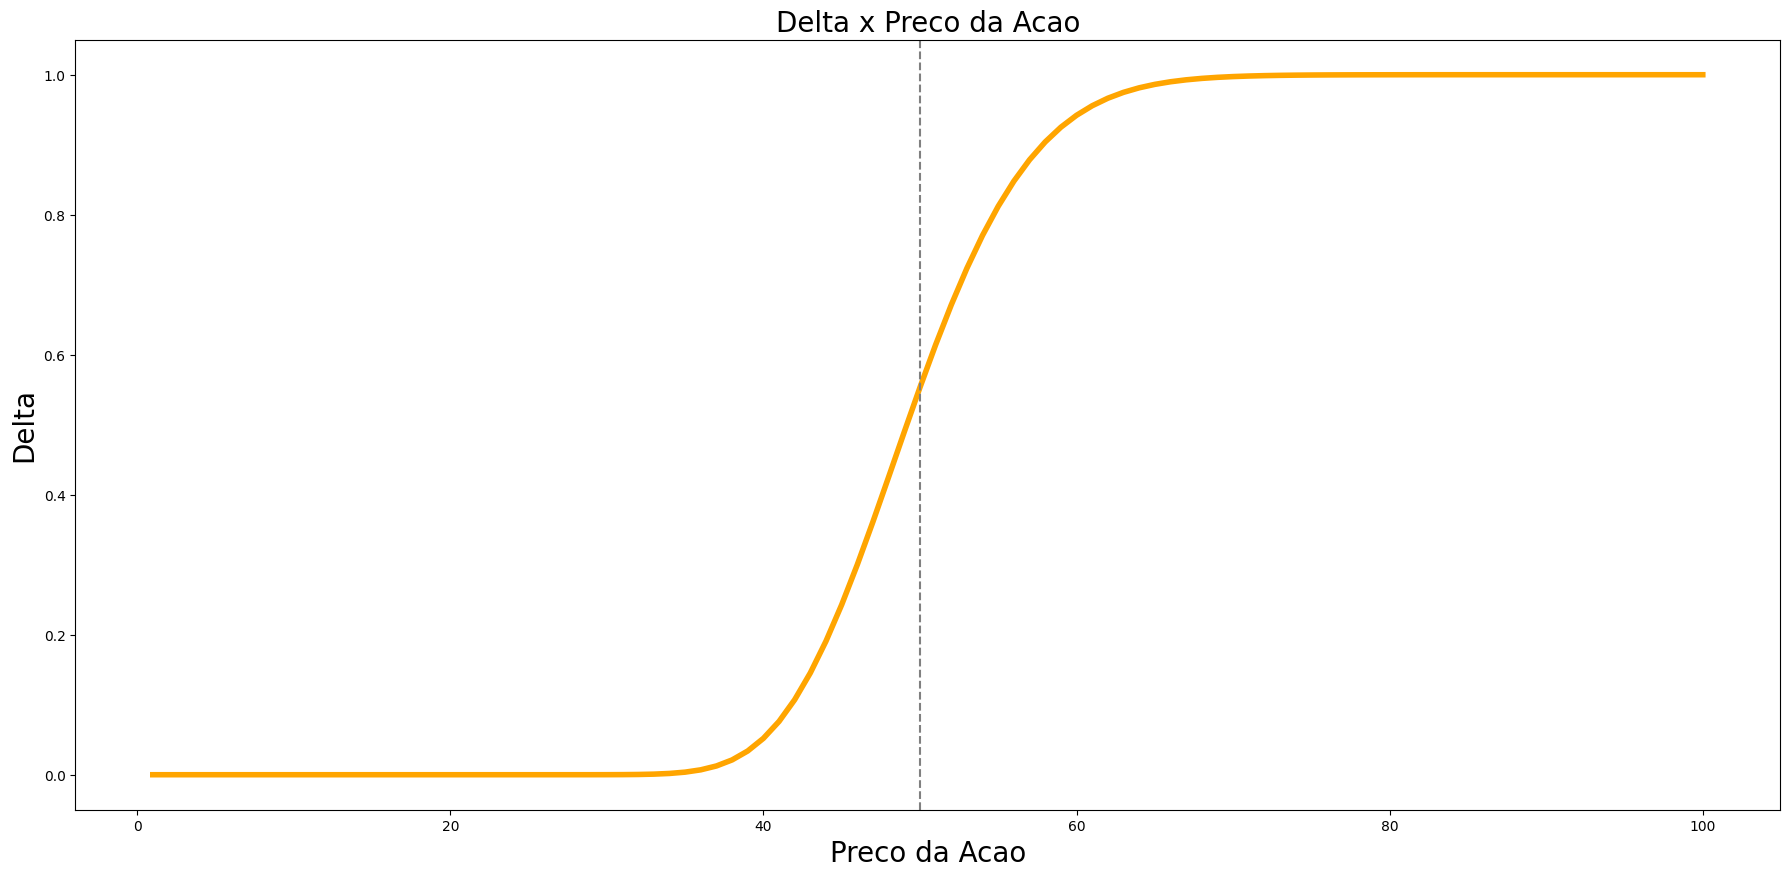

In [ ]:
# Delta
plt.figure(figsize=(22,10))
lista_delta=[]
for a in range(int(S_1*2)+1):
    lista_delta.append(N(delta.subs(S,a).subs(K,K_1).subs(T,T_1).subs(q, q_1).subs(v,v_1).subs(r,r_1)))
df=pd.DataFrame(pd.Series(lista_delta))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Delta x Preco da Acao",fontsize=20,color="black")
plt.xlabel("Preco da Acao",fontsize=20)
plt.ylabel("Delta",fontsize=20)
plt.axvline(x=50, color='gray', linestyle='--') # Colocando uma linha no preco da acao estabelecido

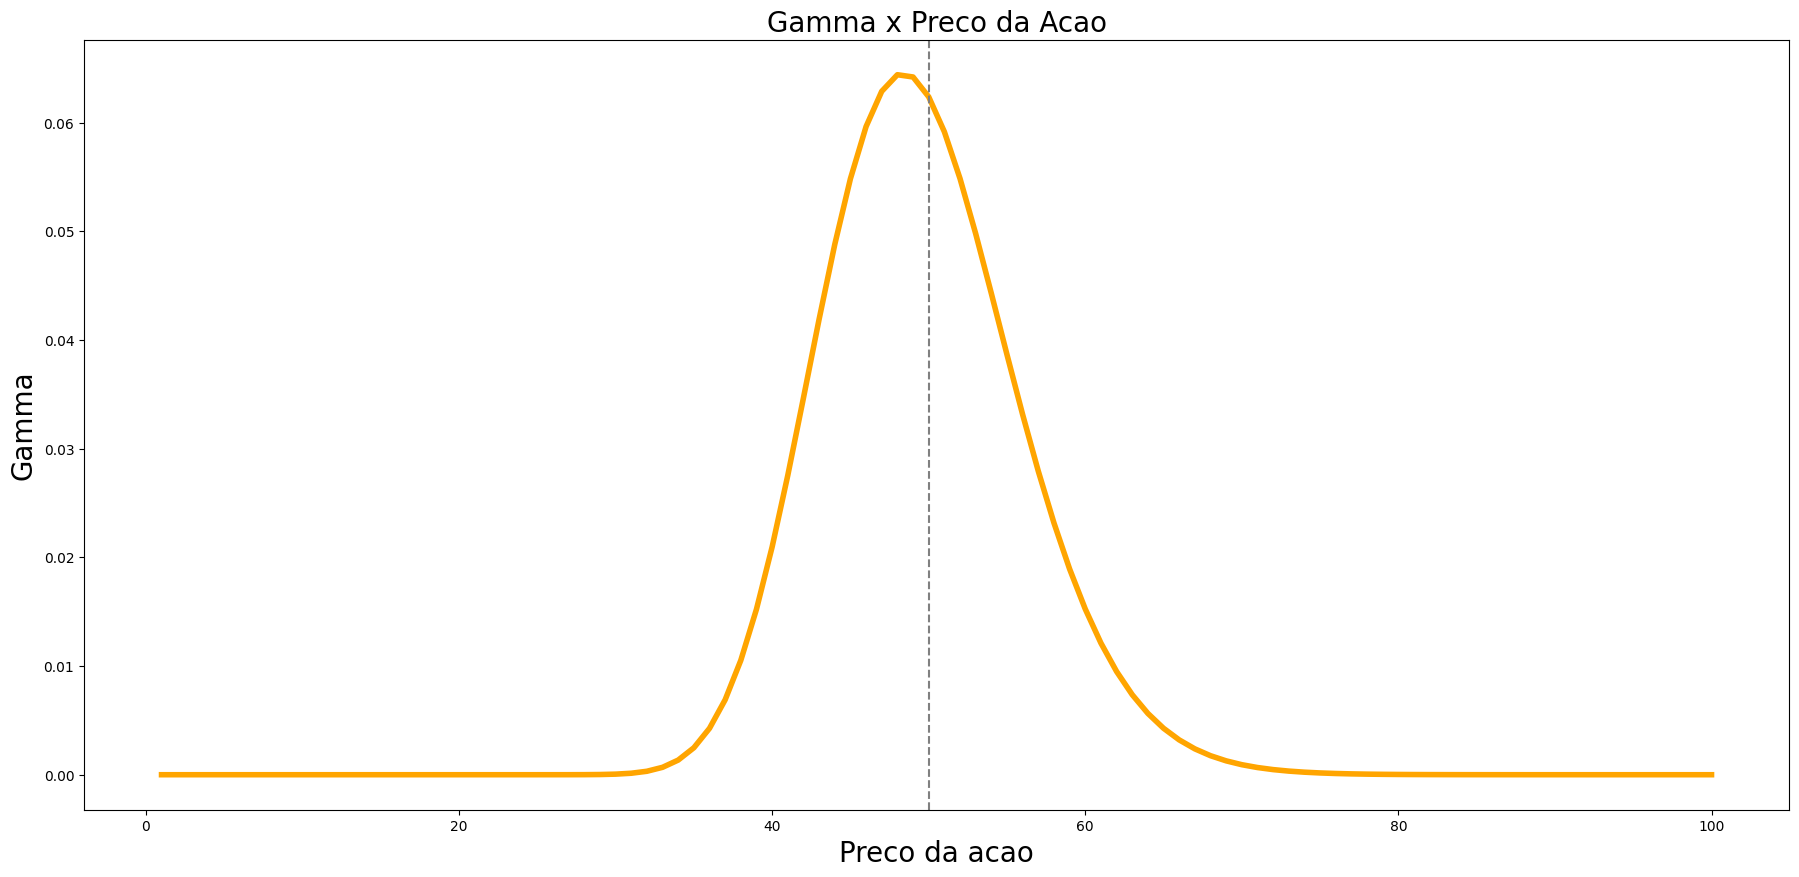

In [ ]:
# Gamma
plt.figure(figsize=(22,10))
lista_gamma=[]
for a in range(int(S_1*2)+1):
    lista_gamma.append(N(gamma.subs(S,a).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,r_1)))
df=pd.DataFrame(pd.Series(lista_gamma))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Gamma x Preco da Acao",fontsize=20,color="black")
plt.xlabel("Preco da acao", fontsize=20)
plt.ylabel("Gamma",fontsize=20)
plt.axvline(x=50, color='gray', linestyle='--') # Colocando uma linha no preco da acao estabelecido
plt.show()

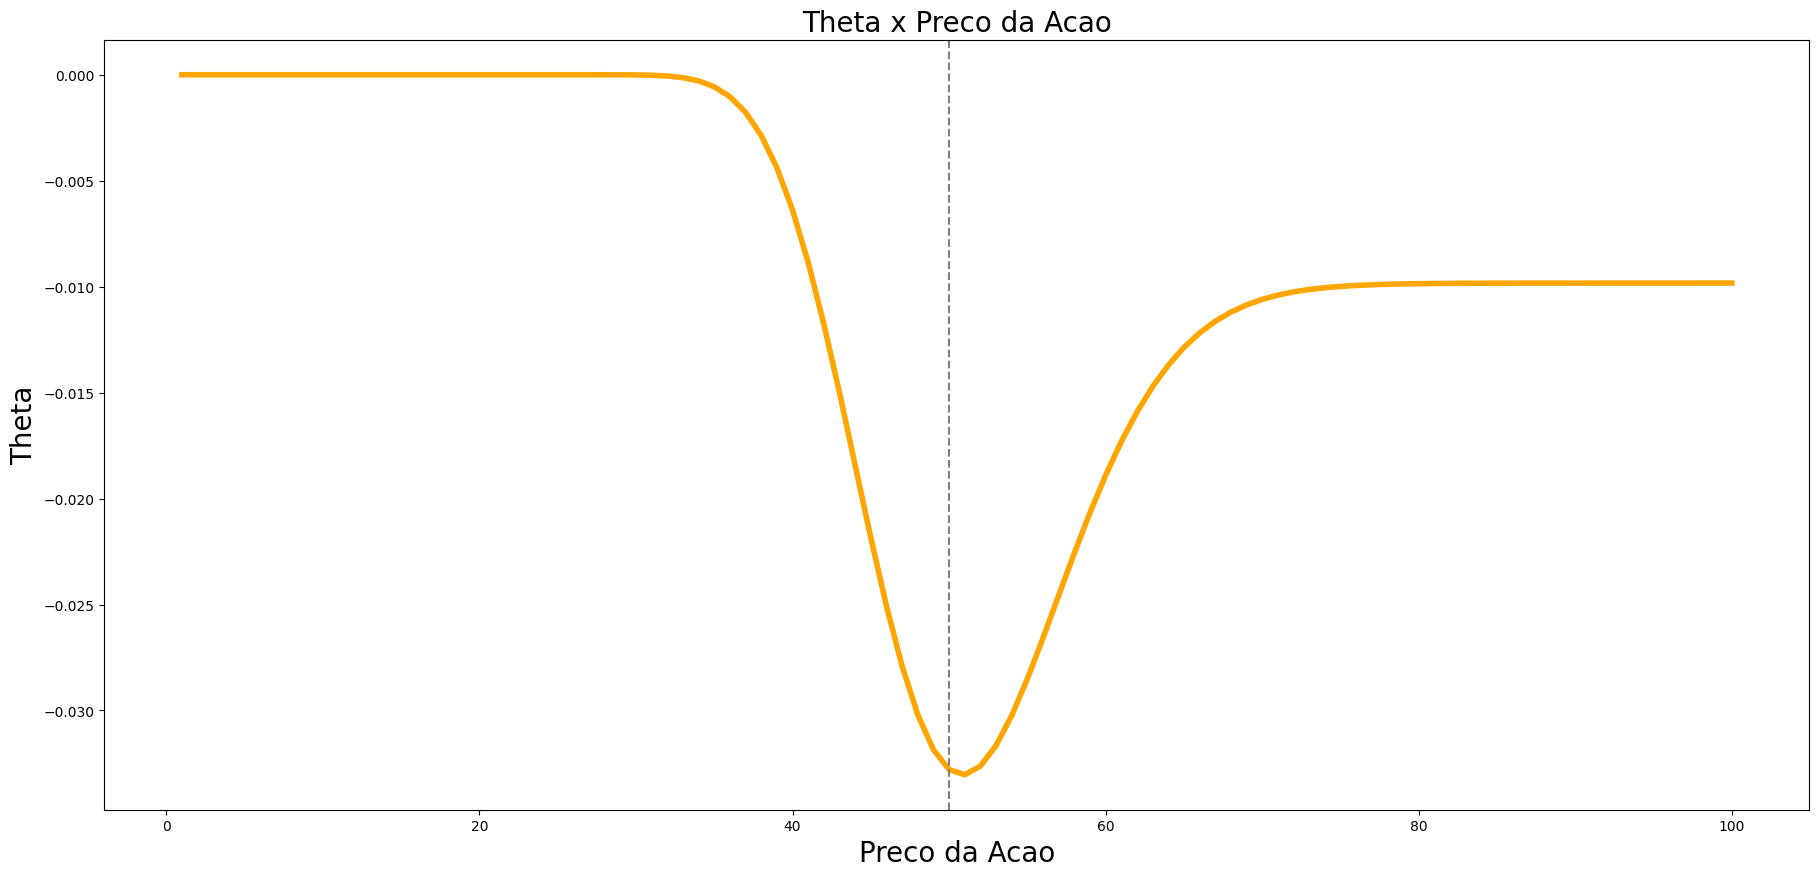

In [ ]:
# Theta
plt.figure(figsize=(22,10))
lista_theta=[]
for a in range(int(S_1*2)+1):
    lista_theta.append(N(theta.subs(S,a).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,r_1)))
df=pd.DataFrame(pd.Series(lista_theta))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Theta x Preco da Acao",fontsize=20,color="black")
plt.xlabel("Preco da Acao",fontsize=20)
plt.ylabel("Theta",fontsize=20)
plt.axvline(x=50, color='gray', linestyle='--') # Colocando uma linha no preco da acao estabelecido
plt.show()

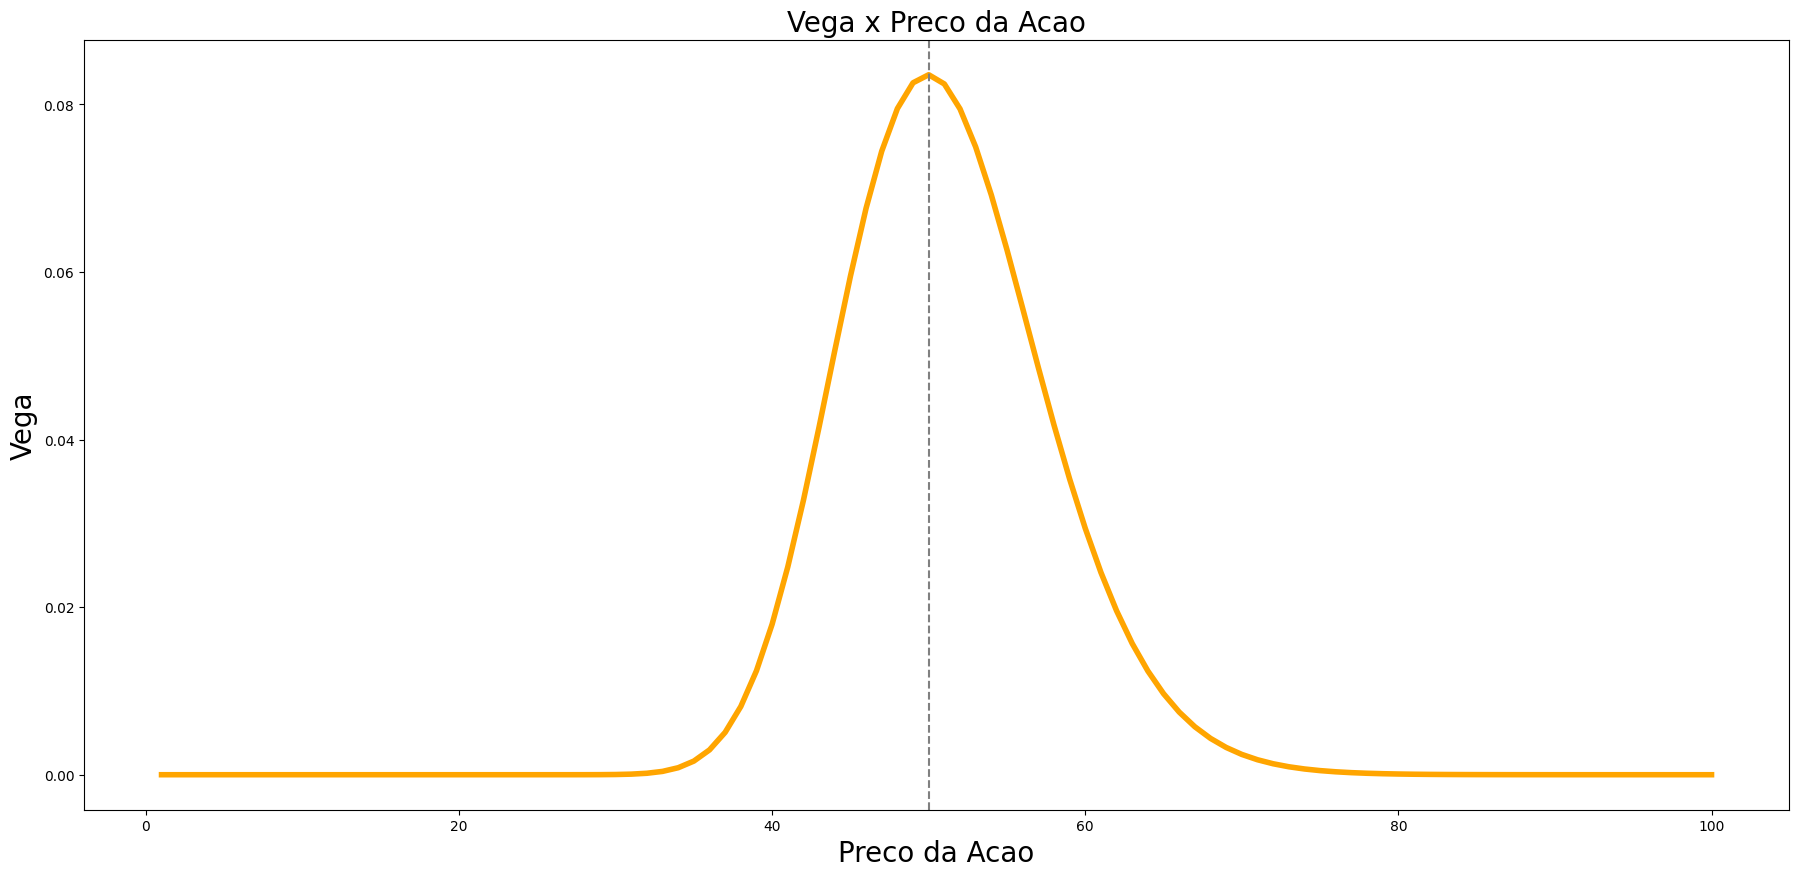

In [ ]:
# Vega
plt.figure(figsize=(22,10))
lista_vega=[]
for a in range(int(S_1*2)+1):
    lista_vega.append(N(vega.subs(S,a).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,r_1)/100))
df=pd.DataFrame(pd.Series(lista_vega))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Vega x Preco da Acao",fontsize=20,color="black")
plt.xlabel("Preco da Acao",fontsize=20)
plt.ylabel("Vega",fontsize=20)
plt.axvline(x=50, color='gray', linestyle='--') # Colocando uma linha no preco da acao estabelecido
plt.show()

Questão 6

Como o delta pode ser interpretado como o risco direcional de uma opção dado a variação de preços de um ativo, podemos caracterizar a estratégia de delta hedging como uma maneira de buscar diminuir seu delta, tornando a opção um investimento menos arriscado. Para efetuar a operção, monta-se uma posição oposta no ativo real para compensar a variação no valor da opção devido à variação no preço do ativo.

In [ ]:
spot_price = S_1  # Preço atual do ativo subjacente
strike_price = K_1  # Preço de exercício da opção
volatility = v_1  # Volatilidade do ativo subjacente
interest_rate = r_1 # Taxa de juros livre de risco
time_to_maturity = T_1  # Tempo até a expiração da opção
num_simulations = 1000  # Número de simulações
num_steps = 252  # Número de passos na simulação (dias de negociação)

# Simulação de preços do ativo subjacente usando o movimento browniano geométrico
np.random.seed(42)
dt = time_to_maturity / num_steps
returns = np.random.normal((interest_rate - 0.5 * volatility**2) * dt, volatility * np.sqrt(dt), (num_simulations, num_steps))
returns = np.concatenate((np.zeros((num_simulations, 1)), returns), axis=1)
cumulative_returns = np.cumsum(returns, axis=1)
stock_prices = spot_price * np.exp(cumulative_returns)

# Função para calcular o delta de uma opção de compra europeia usando a fórmula de Black-Scholes
def calculate_call_delta(spot_price, strike_price, volatility, interest_rate, time_to_maturity):
    call_delta = (N(delta.subs(S,a).subs(K,K_1).subs(T,T_1).subs(q, q_1).subs(v,v_1).subs(r,r_1)))

# Inicialização
initial_call_delta = calculate_call_delta(spot_price, strike_price, volatility, interest_rate, time_to_maturity)
portfolio_value = np.zeros((num_simulations, num_steps + 1))
portfolio_value[:, 0] = initial_call_delta * spot_price  # Valor inicial do portfólio

# Simulação de delta-hedge
for t in range(1, num_steps + 1):
    delta = calculate_call_delta(stock_prices[:, t], strike_price, volatility, interest_rate, time_to_maturity - t * dt)
    portfolio_value[:, t] = portfolio_value[:, t - 1] * np.exp(interest_rate * dt) + (call_delta - initial_call_delta) * stock_prices[:, t]

# Resultados
plt.figure(figsize=(10, 6))
plt.plot(portfolio_value.T, color='gray', alpha=0.5)
plt.xlabel('Passos de Simulação (Dias de Negociação)')
plt.ylabel('Valor do Portfólio')
plt.title('Simulação de Delta-Hedge')
plt.show()


TypeError: ignored